<a href="https://colab.research.google.com/github/DipeshChothwe/Image-classification-Jeans-and-Trousers/blob/master/Assignment4_image_classification_optimisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import datasets, layers, models

import cv2
import numpy as np
import imutils

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
test_path = "/content/drive/My Drive/FliproboAssgn/Test"
train_path = "/content/drive/My Drive/FliproboAssgn/Train"


In [5]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

#Image augmentation definitions


def flip_image(image,dir,image_ID):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name +  "/flip-" + str(image_ID)+str(dir)+Extension, image)
  
def random_rotation(image, angle,image_ID):
    
    random_degree = random.uniform(-angle, angle)
    image = rotated = imutils.rotate(image, angle)
    cv2.imwrite(Folder_name + "/flip-" + str(image_ID)+str(dir)+Extension, image)

def sharpen_image(image,image_ID):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)
    cv2.imwrite(Folder_name+"/Sharpen-"+str(image_ID)+Extension, image)

def apply_brightness(input_img, image_ID, brightness = 0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        image = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        image = input_img.copy()
    
    cv2.imwrite(Folder_name+"/brighten-"+ str(image_ID)+str(brightness) + Extension, image)



In [6]:
import os
jeans_path = '/content/drive/My Drive/FliproboAssgn/Train/Jeans'
trouser_path = '/content/drive/My Drive/FliproboAssgn/Train/Trouser'

Jeans_name = [os.path.join(jeans_path, f) for f in os.listdir(jeans_path) if os.path.isfile(os.path.join(jeans_path, f))]
Trouser_name = [os.path.join(trouser_path, f) for f in os.listdir(trouser_path) if os.path.isfile(os.path.join(trouser_path, f))]


In [7]:
#Image augmentation for Jeans

Extension=".jpeg"

for name in Jeans_name:
  #label preparation for the augmented images
  image_name = name.split("/")[-1]
  image_ID = image_name.split(".")[0]
  #Reading image
  Folder_name = jeans_path
  image = cv2.imread(name)
  #Applying augmentation
  flip_image(image,0,image_ID) #horizontal
  random_rotation(image, 30,image_ID)
  sharpen_image(image,image_ID)
  apply_brightness(image,image_ID, brightness = 25)
  apply_brightness(image,image_ID, brightness = -25)


In [8]:
#Image augmentation for Trousers

Extension=".jpeg"

for name in Trouser_name:
  #label preparation for the augmented images
  image_name = name.split("/")[-1]
  image_ID = image_name.split(".")[0]
  #Reading image
  Folder_name = trouser_path
  image = cv2.imread(name)
  #Applying augmentation
  flip_image(image,0,image_ID) #horizontal
  random_rotation(image, 30,image_ID)
  sharpen_image(image,image_ID)
  apply_brightness(image,image_ID, brightness = 25)
  apply_brightness(image,image_ID, brightness = -25)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Folder_name=train_path
Extension=".jpg"



datagen = ImageDataGenerator()
# load and iterate training dataset
train_image = datagen.flow_from_directory(train_path , class_mode='binary', batch_size=1200)
# load and iterate validation dataset
test_image = datagen.flow_from_directory(test_path , class_mode='binary', batch_size=60)
train_images, train_labels = train_image.next()
test_images, test_labels = test_image.next()

train_images, train_labels = train_image.next()
test_images, test_labels = test_image.next()

Using TensorFlow backend.


Found 1200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [10]:
#Shape of images:
print('Shape of train images', train_images.shape)
print('Shape of test images',test_images.shape)
#print(y, y1)

#Normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

Shape of train images (1200, 256, 256, 3)
Shape of test images (60, 256, 256, 3)


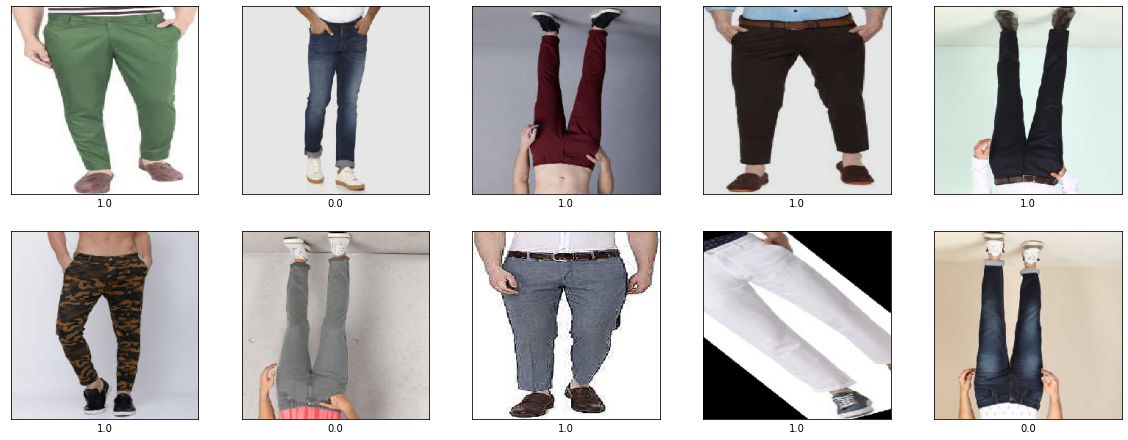

In [11]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()

In [12]:
#CNN model to classify the handwritten numbers:

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto',
                                                 baseline=None, restore_best_weights=True
                                                 )
                      
                        

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.000001
                                                 )
                        
                        


chkpoint = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/FliproboAssgn/model.h5",
                                              monitor="val_loss",
                                              verbose=0,
                                              save_best_only=True,
                                              save_weights_only=False
                                              )

                        
                       

callback = [earlystopping, chkpoint, reduce_lr]

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])


In [13]:
#nadam optimiser
nadam = tf.keras.optimizers.Nadam()

model.compile(optimizer=nadam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
nadam_score = history.history

Epoch 1/20
38/38 [==============================] - 59s 2s/step - loss: 4.6596 - accuracy: 0.5450 - val_loss: 0.9004 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 2/20
38/38 [==============================] - 58s 2s/step - loss: 0.5123 - accuracy: 0.8042 - val_loss: 0.4658 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 3/20
38/38 [==============================] - 58s 2s/step - loss: 0.2102 - accuracy: 0.9317 - val_loss: 0.4221 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 4/20
38/38 [==============================] - 58s 2s/step - loss: 0.1097 - accuracy: 0.9742 - val_loss: 0.4921 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/20
38/38 [==============================] - 58s 2s/step - loss: 0.0659 - accuracy: 0.9917 - val_loss: 0.5169 - val_accuracy: 0.7000 - lr: 0.0010


In [14]:
#Adam optimiser
adam = tf.keras.optimizers.Adam()

model1 = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

model1.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model1.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
adam_score = history.history





Epoch 1/20
38/38 [==============================] - 50s 1s/step - loss: 2.0500 - accuracy: 0.6325 - val_loss: 0.5443 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 2/20
38/38 [==============================] - 53s 1s/step - loss: 0.3103 - accuracy: 0.8525 - val_loss: 0.5283 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 3/20
38/38 [==============================] - 51s 1s/step - loss: 0.1707 - accuracy: 0.9425 - val_loss: 0.4828 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 4/20
38/38 [==============================] - 51s 1s/step - loss: 0.0831 - accuracy: 0.9775 - val_loss: 0.5303 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/20
38/38 [==============================] - 51s 1s/step - loss: 0.0690 - accuracy: 0.9825 - val_loss: 0.5837 - val_accuracy: 0.7000 - lr: 0.0010


In [15]:
#sgd_nesterov optimiser

sgd_nesterov = tf.keras.optimizers.SGD(momentum=0.01, nesterov=True)

model2 = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

model2.compile(optimizer=sgd_nesterov,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model2.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
sgd_nesterov_score = history.history

Epoch 1/20
38/38 [==============================] - 48s 1s/step - loss: 1.5145 - accuracy: 0.6450 - val_loss: 0.6511 - val_accuracy: 0.7833 - lr: 0.0100
Epoch 2/20
38/38 [==============================] - 48s 1s/step - loss: 0.6291 - accuracy: 0.7433 - val_loss: 0.5995 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 3/20
38/38 [==============================] - 49s 1s/step - loss: 0.5745 - accuracy: 0.7492 - val_loss: 0.6119 - val_accuracy: 0.6000 - lr: 0.0100
Epoch 4/20
38/38 [==============================] - 49s 1s/step - loss: 0.5343 - accuracy: 0.7725 - val_loss: 0.5312 - val_accuracy: 0.7667 - lr: 0.0100
Epoch 5/20
38/38 [==============================] - 49s 1s/step - loss: 0.4854 - accuracy: 0.8025 - val_loss: 0.5023 - val_accuracy: 0.7667 - lr: 0.0100
Epoch 6/20
38/38 [==============================] - 49s 1s/step - loss: 0.4448 - accuracy: 0.8242 - val_loss: 0.4700 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 7/20
38/38 [==============================] - 49s 1s/step - loss: 0.4205 - a

In [16]:
#rms_prop optimiser

rms_prop = tf.keras.optimizers.RMSprop()

model3 = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

model3.compile(optimizer=rms_prop,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model3.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
rms_prop_score = history.history

Epoch 1/20
38/38 [==============================] - 50s 1s/step - loss: 14.4452 - accuracy: 0.5258 - val_loss: 2.2307 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/20
38/38 [==============================] - 49s 1s/step - loss: 0.8721 - accuracy: 0.7283 - val_loss: 0.6892 - val_accuracy: 0.6167 - lr: 0.0010
Epoch 3/20
38/38 [==============================] - 49s 1s/step - loss: 0.2860 - accuracy: 0.8908 - val_loss: 0.5568 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 4/20
38/38 [==============================] - 49s 1s/step - loss: 0.1590 - accuracy: 0.9475 - val_loss: 0.6680 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 5/20
38/38 [==============================] - 49s 1s/step - loss: 0.0999 - accuracy: 0.9650 - val_loss: 0.5624 - val_accuracy: 0.7500 - lr: 0.0010


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 462400)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 924802    
Total params: 926,594
Trainable params: 926,594
Non-trainable params: 0
__________________________________________________

38/38 - 18s - loss: 0.1389 - accuracy: 0.9550
2/2 - 0s - loss: 0.4221 - accuracy: 0.7333
test accuracy: 0.7333333492279053
train accuracy: 0.9549999833106995


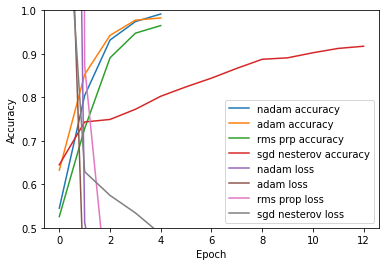

In [23]:
plt.plot(nadam_score['accuracy'], label='nadam accuracy')
plt.plot(adam_score['accuracy'], label='adam accuracy')
plt.plot(rms_prop_score['accuracy'], label='rms prp accuracy')
plt.plot(sgd_nesterov_score['accuracy'], label='sgd nesterov accuracy')

plt.plot(nadam_score['loss'], label='nadam loss')
plt.plot(adam_score['loss'], label='adam loss')
plt.plot(rms_prop_score['loss'], label='rms prop loss')
plt.plot(sgd_nesterov_score['loss'], label='sgd nesterov loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



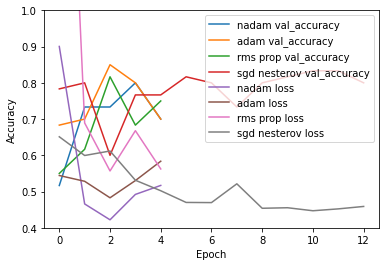

In [29]:
plt.plot(nadam_score['val_accuracy'], label = 'nadam val_accuracy')
plt.plot(adam_score['val_accuracy'], label = 'adam val_accuracy')
plt.plot(rms_prop_score['val_accuracy'], label = 'rms prop val_accuracy')
plt.plot(sgd_nesterov_score['val_accuracy'], label = 'sgd nesterov val_accuracy')

plt.plot(nadam_score['val_loss'], label='nadam loss')
plt.plot(adam_score['val_loss'], label='adam loss')
plt.plot(rms_prop_score['val_loss'], label='rms prop loss')
plt.plot(sgd_nesterov_score['val_loss'], label='sgd nesterov loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc="best")

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)